## Advanced Lane Finding Project

The goals / steps of this project are the following:

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## 1. Camera calibration using chessboard images

#### Examine calibration images

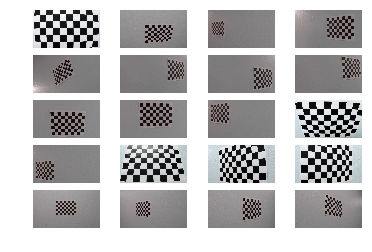

In [22]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline

images = glob.glob('./camera_cal/calibration*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    plt.subplot(5,len(images)//5,idx+1)
    plt.axis('off')
    plt.imshow(img)
    




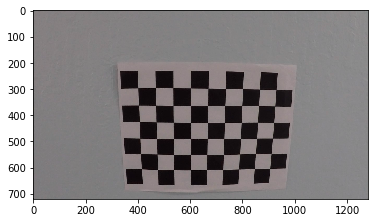

In [23]:
plt.imshow(cv2.imread(images[8]))

*Notice there are 6x9 inner corners which will be used as object points*

In [83]:
# prepare object points, like (0,0,0), (1,0,0), ..., (8,0,0),(0,1,0),(0,2,0),....,(8,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape((-1,2)) #pythonian magic to make (x,y,0) coordinate array

# Arrays to store object points and image points from all the images.
objPoints = [] # 3d points in real world space
imgPoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    found, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # If found, add object points, image points
    if found:
        objPoints.append(objp)
        imgPoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, found)
        cv2.imshow('img',img)
        cv2.waitKey(100)

cv2.destroyAllWindows()

In [85]:
print(len(images))
print(len(objPoints))
print(len(imgPoints))

20
17
17


## Use image points and object points from previous step to calibrate camera

In [88]:
import pickle

def calibrate(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = img
    if len(gray.shape) == 3:
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
    return  cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) #[::-1] == reverse 


img = cv2.imread("./camera_cal/calibration8.jpg")
ret, mtx, dist, rvecs, tvecs = calibrate(img,objPoints,imgPoints)

file_Name = "camera_matrix.p"
f = open(file_Name,'wb') 
pickle.dump({"mtx":mtx,"dist":dist},f)   
f.close()

### Use camera matrix and distortion matrix to unwarp corners

In [69]:
print(mtx)

[[ 560.3791428     0.          651.26994488]
 [   0.          561.41684856  499.12400965]
 [   0.            0.            1.        ]]
